In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv('Happiness Index 2018-2019.csv')
df

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [235]:
df.duplicated().sum()

0

In [237]:
df['Year'].unique()

array([2019, 2018], dtype=int64)

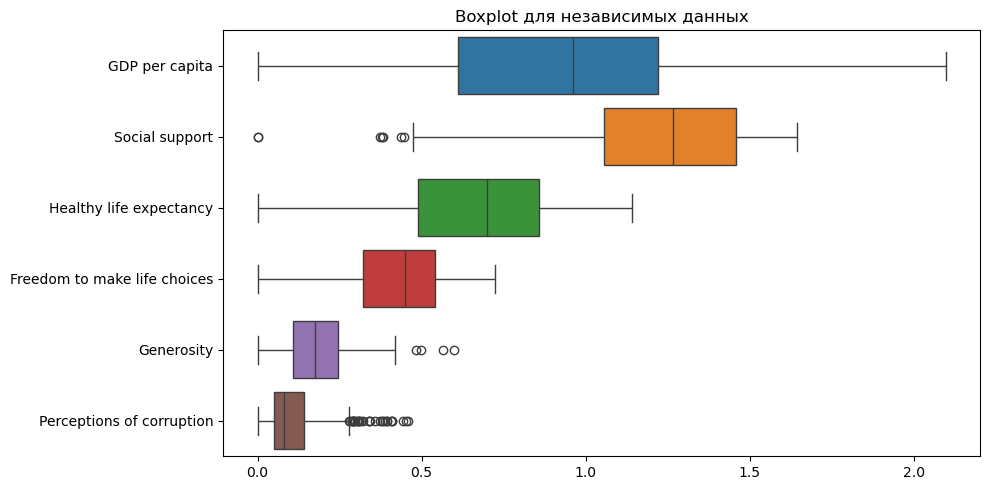

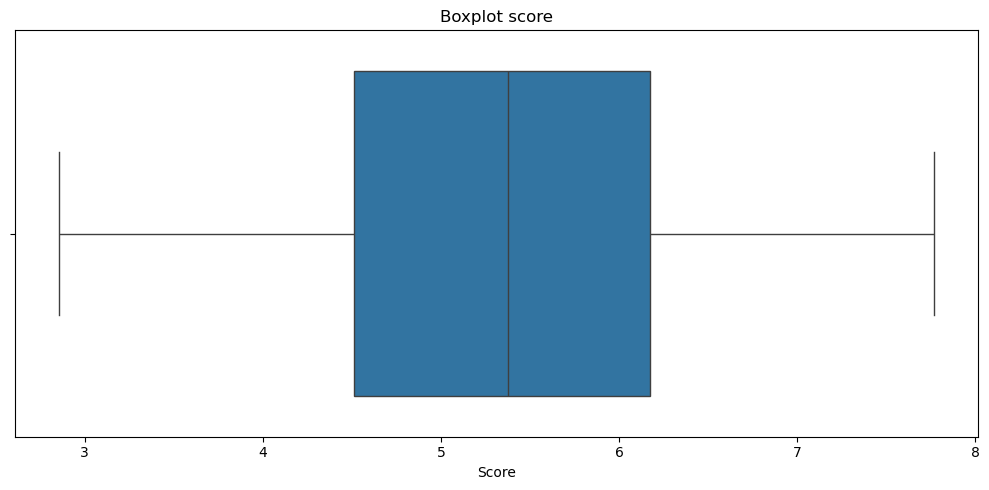

In [239]:
df_numbers_without_score = df.drop(columns=['Overall rank', 'Country or region', 'Year', 'Score'])
plt.figure(figsize=(10,5))
sns.boxplot(data = df_numbers_without_score, orient='h');
plt.title('Boxplot для независимых данных');
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(data = df['Score'], orient='h');

plt.title('Boxplot score');
plt.tight_layout()
plt.show()

In [240]:
columns_with_outliers = [
    'Social support',
    'Generosity',
    'Perceptions of corruption']

for col in columns_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f'   Выбросы в столбце "{col}":')
    print(f'Медиана: {median:.3f}')
    print(f'Нижняя граница: {lower:.3f}')
    print(f'Верхняя граница: {upper:.3f}')
    print(outliers[['Country or region', col]])
    print('-' * 60)

   Выбросы в столбце "Social support":
Медиана: 1.265
Нижняя граница: 0.453
Верхняя граница: 2.060
            Country or region  Social support
26                      Benin           0.437
27                      Benin           0.372
42                    Burundi           0.447
50   Central African Republic           0.000
51   Central African Republic           0.000
268                     Syria           0.378
269                     Syria           0.382
------------------------------------------------------------
   Выбросы в столбце "Generosity":
Медиана: 0.175
Нижняя граница: -0.096
Верхняя граница: 0.449
    Country or region  Generosity
118         Indonesia       0.498
119         Indonesia       0.484
191           Myanmar       0.566
192           Myanmar       0.598
------------------------------------------------------------
   Выбросы в столбце "Perceptions of corruption":
Медиана: 0.082
Нижняя граница: -0.087
Верхняя граница: 0.278
    Country or region  Perceptions

Учитывая страны где аномальные значения по показателям Social support и Generosity то они довольно логичны. На первый взгляд непонятна ситуация с показателем Perceptions of corruption. По сути значения ближе к 1 значат что люди считают, что коррупции почти нет и поэтому представленные страны тоже логичны. Таким образом принято решение не удалять выбросы.

In [244]:
df_numbers = df.drop(columns=['Overall rank', 'Country or region', 'Year'])

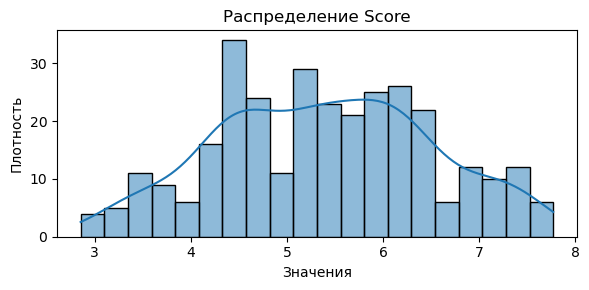

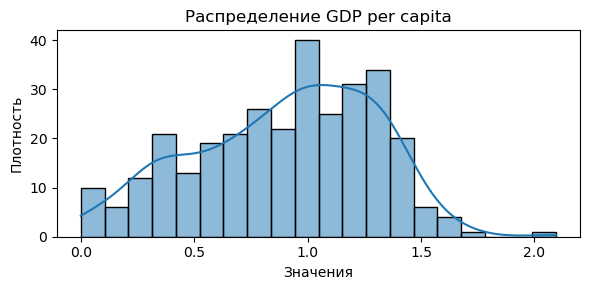

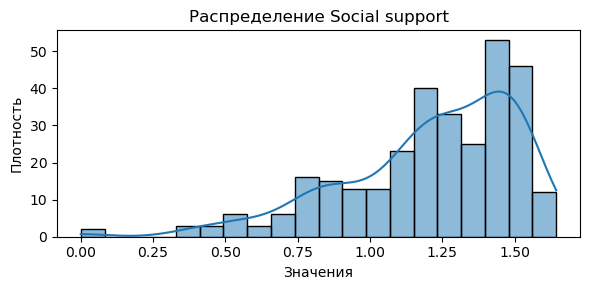

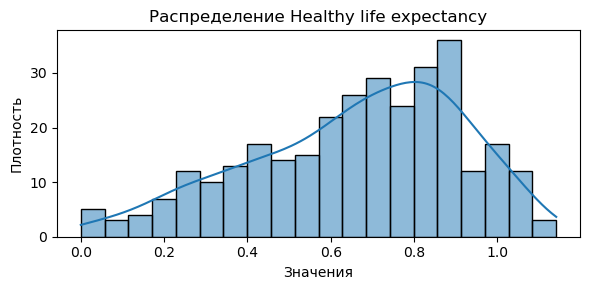

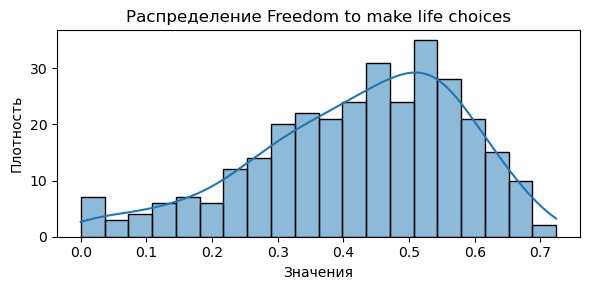

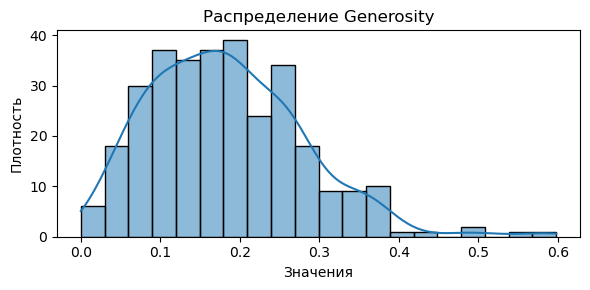

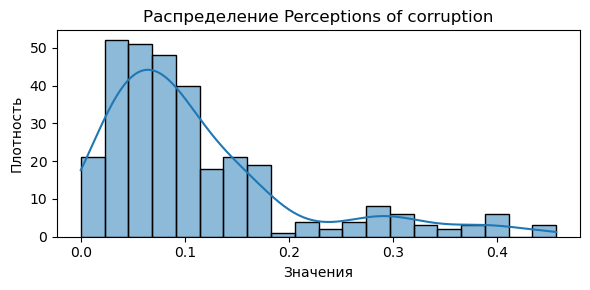

In [246]:
for column in df_numbers.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_numbers[column],  bins=20, kde=True)

    plt.title(f'Распределение {column}')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.tight_layout()
    plt.show()

Score:
Распределение примерно нормальное, со сдвигом немного влево. Это говорит о том, что большинство стран имеют средние значения уровня счастья, а крайне низкие и крайне высокие оценки встречаются реже

GDP per capita:
Распределение слегка скошено вправо: большинство стран имеют средний или чуть ниже среднего ВВП, а высокие значения ВВП наблюдаются реже. Это типичное распределение дохода — с богатыми странами в хвосте

Healthy life expectancy:
Распределение похоже на нормальное, но немного скошено вправо. Основная масса стран имеет средние значения, а очень низкие показатели встречаются редко.

Freedom to make life choices:
Распределение близко к нормальному, но с небольшим скошиванием вправо. Это указывает на то, что в большинстве стран уровень свободы находится на среднем или высоком уровне

Generosity:
Распределение  асимметричное, с пиком на малых значениях — большинство стран имеют низкие значения щедрости

Perceptions of corruption:
скошено влево. большинство стран оценивают уровень коррупции как высокий (т.е. низкое значение индекса), а восприятие низкой коррупции встречается редко

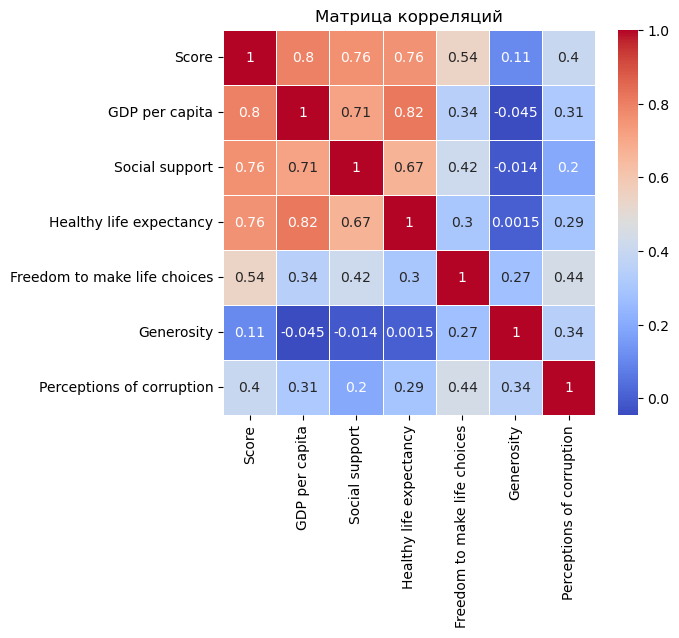

In [248]:
df_mtx = df.drop(columns=['Overall rank', 'Country or region', 'Year'])
correlation_matrix = df_mtx.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций")
plt.show()

Score сильно коррелирует с GDP per capita (0.8), Social support (0.76) и Healthy life expectancy (0.76). Однако между ними самими тоже наблюдается мультиколлениарность. Так как наблюдается сильная мультиколлениарность, то обычная линейная регрессия не подходит. Сравним Lasso, Ridge и Random Forest и выберем самую эффективную модель

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_numbers_without_score
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {'Ridge': Ridge(alpha=1.0), 'Lasso': Lasso(alpha=0.1)}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} results:")
    print("R²:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Ridge results:
R²: 0.7376604653075842
MAE: 0.4202727256630091
RMSE: 0.5273681335463407

Lasso results:
R²: 0.7274797818487453
MAE: 0.4272916250753377
RMSE: 0.53750359811636


In [252]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest results:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", rmse)


Random Forest results:
R²: 0.7796285122755267
MAE: 0.3479623809523804
RMSE: 0.4833477637730872


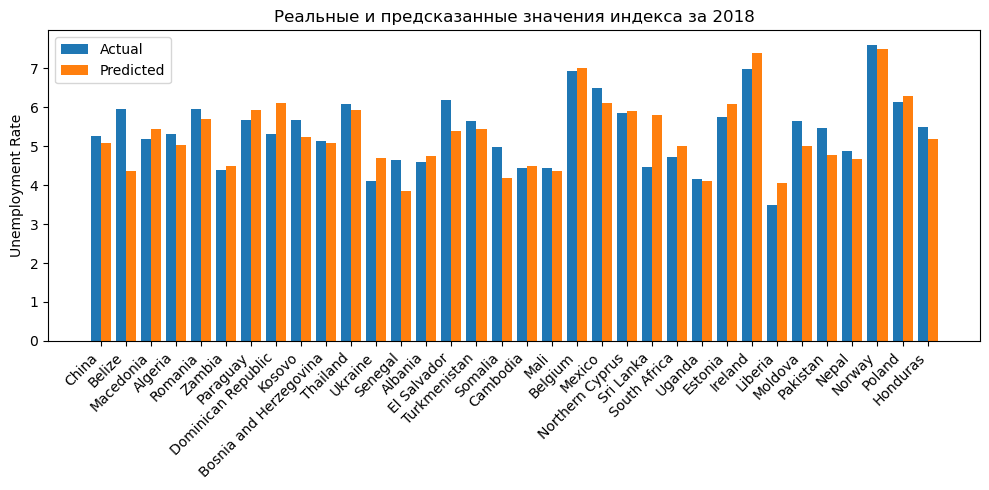

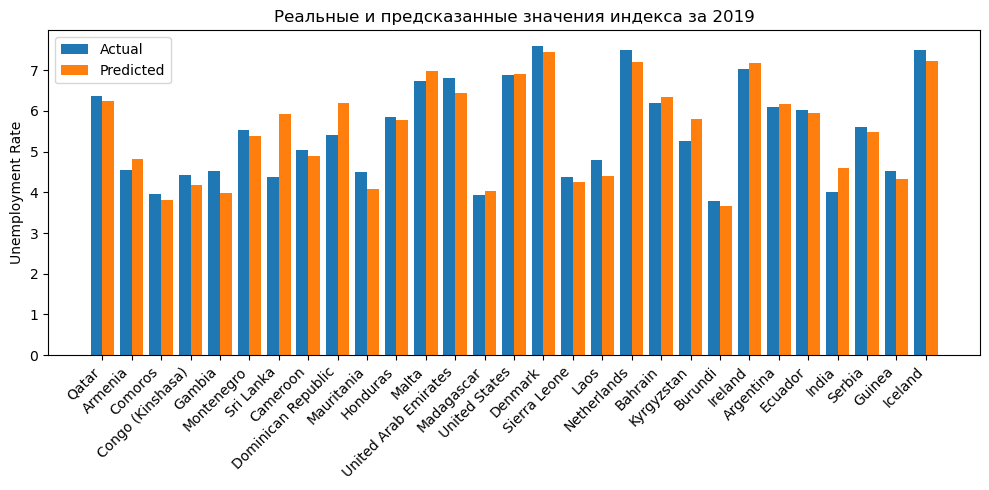

In [253]:
y_pred = rf.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Country or region': df.loc[X_test.index, 'Country or region'].values,
    'Year': df.loc[X_test.index, 'Year'].values
})

comparison_df = comparison_df.round(2)

years = comparison_df['Year'].unique()

for year in sorted(years):
    data = comparison_df[comparison_df['Year'] == year]
    x = np.arange(len(data))
    width = 0.4

    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.bar(x - width/2, data['Actual'], width, label='Actual')
    rects2 = ax.bar(x + width/2, data['Predicted'], width, label='Predicted')

    ax.set_xticks(x)
    ax.set_xticklabels(data['Country or region'], rotation=45, ha='right')
    ax.set_ylabel('Unemployment Rate')
    ax.set_title(f'Реальные и предсказанные значения индекса за {year}')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [254]:
print(len(X_test))

63


На графике представленнв значения индекса счастья для наблюдений которые были выбраны в качестве тестовых, а именно для 63 значений. По графику видно что модель предсказывает значения индекма довольно точно. Нет смысла сравнивать со всеми значениями так как значений слишком много чтобы это нормально выглядело. 